### The notebook shows the analysis of Happiness score of different world countries from 2015-2021 and also the effect of COVID-19 on happiness of people.

In [1]:
import pandas as pd
import requests
import folium

### DATA Extraction and Cleaning

In [49]:
df_15 = pd.read_csv("2015.csv")
df_15['Year'] = 2015
df_15.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015


In [3]:
df_16 = pd.read_csv("2016.csv")
df_16['Year'] = 2016
df_16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [4]:
df_17 = pd.read_csv("2017.csv")
df_17["Year"] = 2017
df_17 = df_17.rename(columns = {"Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score",
                                "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                                "Health..Life.Expectancy.":"Health (Life Expectancy)",
                                "Trust..Government.Corruption.":"Trust (Government Corruption)",
                               "Dystopia.Residual":"Dystopia Residual"})
df_17.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [5]:
df_18 = pd.read_csv("2018.csv")
df_18['Year'] = 2018
df_18 = df_18.rename(columns= {"Overall rank":"Happiness Rank","Country or region":"Country",
                              "Score":"Happiness Score","GDP per capita":"Economy (GDP per Capita)",
                              "Social support":"Family","Healthy life expectancy":"Health (Life Expectancy)",
                              "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"})
df_18.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [6]:
df_19 = pd.read_csv("2019.csv")
df_19["Year"] = 2019
df_19 = df_19.rename(columns= {"Overall rank":"Happiness Rank","Country or region":"Country",
                              "Score":"Happiness Score","GDP per capita":"Economy (GDP per Capita)",
                              "Social support":"Family","Healthy life expectancy":"Health (Life Expectancy)",
                              "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"})
df_19.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [7]:
df_20= pd.read_csv("2020.csv")
df_20['Year'] = 2020
df_20['Happiness Rank'] =  range(1, len(df_20.index)+1)
df_20 = df_20.rename(columns= {"Country name":"Country",
                        "Ladder score":"Happiness Score","Logged GDP per capita":"Economy (GDP per Capita)",
                              "Social support":"Family","Healthy life expectancy":"Health (Life Expectancy)",
                              "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"})
df_20.head()
# df_20.columns

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Happiness Rank
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020,1
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020,2
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020,3
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020,4
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020,5


In [8]:
df_21 = pd.read_csv("2021.csv")
df_21['Year'] =2021
df_21['Happiness Rank'] =  range(1, len(df_21.index)+1)
df_21 = df_21.rename(columns= {"Country name":"Country",
                              "Ladder score":"Happiness Score","Logged GDP per capita":"Economy (GDP per Capita)",
                              "Social support":"Family","Healthy life expectancy":"Health (Life Expectancy)",
                              "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"})
df_21.head()

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Happiness Rank
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021,1
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021,2
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021,3
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021,4
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021,5


### One dataframe for all years

In [9]:
# store all years data in new dataframe

data_Happi = pd.DataFrame(columns =['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)',
                                   'Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
                                   'Generosity','Year'])

data = [df_15,df_16,df_17,df_18,df_19,df_20,df_21]

for i in data:
    data_Happi = data_Happi.append(i[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)',
                                   'Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
                                   'Generosity','Year']], ignore_index='True')
    
data_Happi

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,145,3.512,7.92600,0.78700,48.70000,0.71500,0.91500,-0.13100,2021
1080,Botswana,146,3.467,9.78200,0.78400,59.26900,0.82400,0.80100,-0.24600,2021
1081,Rwanda,147,3.415,7.67600,0.55200,61.40000,0.89700,0.16700,0.06100,2021
1082,Zimbabwe,148,3.145,7.94300,0.75000,56.20100,0.67700,0.82100,-0.04700,2021


### Dataframe containing only Happiness Score for comparing top and bottom 5 countries

In [10]:
# compare top and bottom 5 countries and bottom 5 countries based on Happiness Score

data_avg = data_Happi.pivot_table(index='Country', columns='Year',values=['Happiness Score'])
data_avg = data_avg.reset_index()

data_avg = data_avg.dropna(axis=0)

data_avg['AVG'] = data_avg.mean(axis=1)
data_sv = data_avg
data_avg = data_avg.sort_values(by='AVG', ascending=False)
data_avg['Rank'] = range(1,len(data_avg)+1)

# top_hap = data_avg[0:5]
data_avg = data_avg.set_index(['Country','Rank'])
data_avg.head()

Happiness Score                                             \
Year                        2015   2016   2017   2018   2019    2020   2021   
Country     Rank                                                              
Finland     1              7.406  7.413  7.469  7.632  7.769  7.8087  7.842   
Denmark     2              7.527  7.526  7.522  7.555  7.600  7.6456  7.620   
Switzerland 3              7.587  7.509  7.494  7.487  7.480  7.5599  7.571   
Iceland     4              7.561  7.501  7.504  7.495  7.494  7.5045  7.554   
Norway      5              7.522  7.498  7.537  7.594  7.554  7.4880  7.392   

                       AVG  
Year                        
Country     Rank            
Finland     1     7.619957  
Denmark     2     7.570800  
Switzerland 3     7.526843  
Iceland     4     7.516214  
Norway      5     7.512143

In [11]:
data_avg.tail()

Happiness Score                                             \
Year                        2015   2016   2017   2018   2019    2020   2021   
Country     Rank                                                              
Yemen       133            4.077  3.724  3.593  3.355  3.380  3.5274  3.658   
Tanzania    134            3.781  3.666  3.349  3.303  3.231  3.4762  3.623   
Rwanda      135            3.465  3.515  3.471  3.408  3.334  3.3123  3.415   
Burundi     136            2.905  2.905  2.905  2.905  3.775  3.7753  3.775   
Afghanistan 137            3.575  3.360  3.794  3.632  3.203  2.5669  2.523   

                       AVG  
Year                        
Country     Rank            
Yemen       133   3.616343  
Tanzania    134   3.489886  
Rwanda      135   3.417186  
Burundi     136   3.277900  
Afghanistan 137   3.236271

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



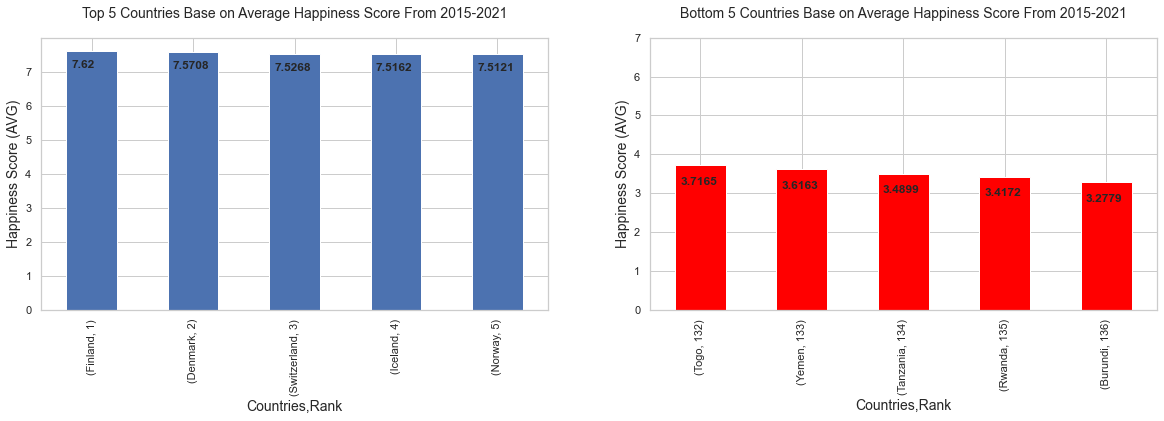

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Happiness Score From 2015-2021", fontsize=14,y=1.05)
data_avg[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,8,step=1))

for index,data in enumerate(np.round(data_avg[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.5, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Happiness Score From 2015-2021", fontsize=14,y=1.05)
data_avg[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,8,step=1))

for index,data in enumerate(np.round(data_avg[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.5, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score (AVG)", fontsize=14)

plt.show()

### Map showing Country Name along with Happiness Rank on the Basis of Average Happiness Score from 2020-2021

In [13]:
show_map = folium.Map(zoom_start = 4)
from geopy.geocoders import Nominatim

lat=[]
lng=[]
for i in data_avg.index:
    geolocator = Nominatim(user_agent = 'explorer')
    location = geolocator.geocode(i[0])
    lat.append(location.latitude)
    lng.append(location.longitude)

# print(lat,lng)
data_avg['Lat'] = lat
data_avg['Lng'] = lng


In [14]:

# # # add markers to map
i=0
for lat, lng, con in zip(data_avg['Lat'], data_avg['Lng'], data_avg.index):
    label = '{}, {}'.format(data_avg.index[i][0], data_avg.index[i][1])
    i+=1
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(show_map)  


show_map

### Dataframe containing only Economy Score to compare top and bottom 5 countires

In [56]:
# compare top and bottom 5 countries and bottom 5 countries based on Economy (GDP per Capita)

data_avg_Eco = data_Happi.pivot_table(index='Country', columns='Year',values=['Economy (GDP per Capita)'])
data_avg_Eco = data_avg_Eco.reset_index()

data_avg_Eco = data_avg_Eco.dropna(axis=0)

data_avg_Eco['AVG'] = data_avg_Eco.mean(axis=1)
data_ec = data_avg_Eco
data_avg_Eco = data_avg_Eco.sort_values(by='AVG', ascending=False)
data_avg_Eco['Rank'] = range(1,len(data_avg_Eco)+1)

data_avg_Eco = data_avg_Eco.set_index(['Country','Rank'])
data_ec.head()

Country Economy (GDP per Capita)                                   \
Year                                  2015     2016      2017   2018   2019   
0     Afghanistan                  0.31982  0.38227  0.401477  0.332  0.350   
1         Albania                  0.87867  0.95530  0.996193  0.916  0.947   
2         Algeria                  0.93929  1.05266  1.091864  0.979  1.002   
4       Argentina                  1.05351  1.15137  1.185295  1.073  1.092   
5         Armenia                  0.76821  0.86086  0.900597  0.816  0.850   

                            AVG  
Year      2020   2021            
0     7.462861  7.695  2.420490  
1     9.417931  9.520  3.375870  
2     9.537965  9.342  3.420683  
4     9.810955  9.962  3.618304  
5     9.100476  9.487  3.254735

In [57]:
data_ec.tail()

Country Economy (GDP per Capita)                                   \
Year                                2015     2016      2017   2018   2019   
167   Venezuela                  1.04424  1.13367  1.128431  0.996  0.960   
168     Vietnam                  0.63216  0.74037  0.788548  0.715  0.741   
169       Yemen                  0.54649  0.57939  0.591683  0.442  0.287   
170      Zambia                  0.47038  0.61202  0.636407  0.562  0.578   
171    Zimbabwe                  0.27100  0.35041  0.375847  0.357  0.366   

                            AVG  
Year      2020   2021            
167   8.977794  9.073  3.330448  
168   8.809546  8.973  3.057089  
169   7.759683  7.578  2.540607  
170   8.224720  8.145  2.746932  
171   7.865712  7.943  2.504138

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


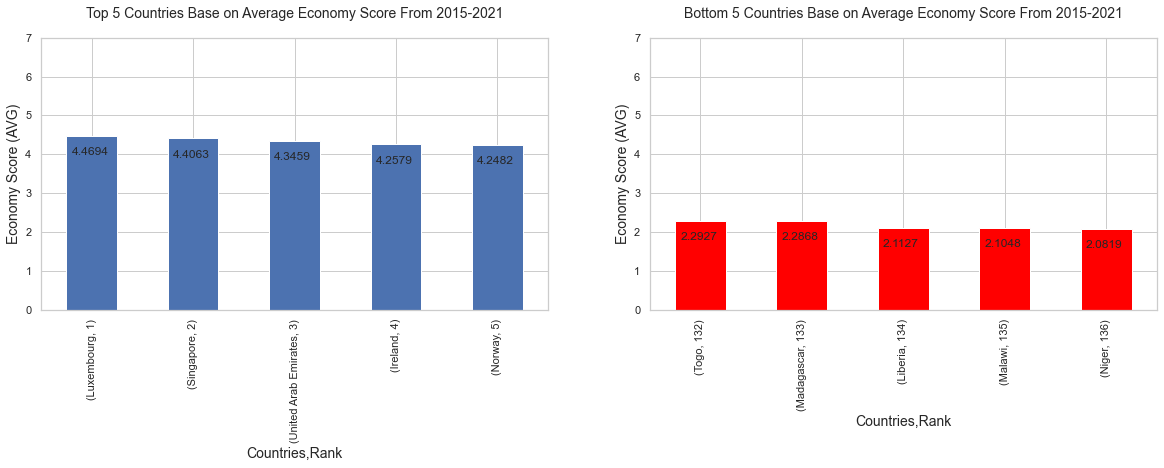

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Economy Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Eco[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,8,step=1))

for index,data in enumerate(np.round(data_avg_Eco[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.5, s=f"{data}", fontdict=dict(fontsize=12))
plt.ylabel("Economy Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Economy Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Eco[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,8,step=1))

for index,data in enumerate(np.round(data_avg_Eco[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.5, s=f"{data}",fontdict=dict(fontsize=12))
plt.ylabel("Economy Score (AVG)", fontsize=14)

plt.show()

### Dataframe containing only Family (Scoial support) Score to compare top and bottom 5 countires

In [58]:
# compare top and bottom 5 countries and bottom 5 countries based on Family Score

data_avg_Fam = data_Happi.pivot_table(index='Country', columns='Year',values=['Family'])
data_avg_Fam = data_avg_Fam.reset_index()

data_avg_Fam = data_avg_Fam.dropna(axis=0)

data_avg_Fam['AVG'] = data_avg_Fam.mean(axis=1)
data_fm = data_avg_Fam
data_avg_Fam = data_avg_Fam.sort_values(by='AVG', ascending=False)
data_avg_Fam['Rank'] = range(1,len(data_avg_Fam)+1)

data_avg_Fam = data_avg_Fam.set_index(['Country','Rank'])
data_fm.head()

Country   Family                                                    \
Year                  2015     2016      2017   2018   2019      2020   2021   
0     Afghanistan  0.30285  0.11037  0.581543  0.537  0.517  0.470367  0.463   
1         Albania  0.80434  0.50163  0.803685  0.817  0.848  0.671070  0.697   
2         Algeria  1.07772  0.83309  1.146217  1.154  1.160  0.803385  0.802   
4       Argentina  1.24823  1.06612  1.440451  1.468  1.432  0.900568  0.898   
5         Armenia  0.77711  0.62477  1.007484  0.990  1.055  0.757479  0.799   

           AVG  
Year            
0     0.426019  
1     0.734675  
2     0.996630  
4     1.207624  
5     0.858692

In [59]:
data_fm.tail()

Country   Family                                                    \
Year                2015     2016      2017   2018   2019      2020   2021   
167   Venezuela  1.25596  1.03302  1.431338  1.469  1.427  0.890408  0.861   
168     Vietnam  0.91226  0.79117  1.277491  1.365  1.346  0.849987  0.850   
169       Yemen  0.68093  0.47493  0.935382  1.073  1.163  0.817981  0.832   
170      Zambia  0.91612  0.63760  1.003187  1.047  1.058  0.698824  0.708   
171    Zimbabwe  1.03276  0.71478  1.083096  1.094  1.114  0.763093  0.750   

           AVG  
Year            
167   1.195389  
168   1.055987  
169   0.853889  
170   0.866962  
171   0.935961

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


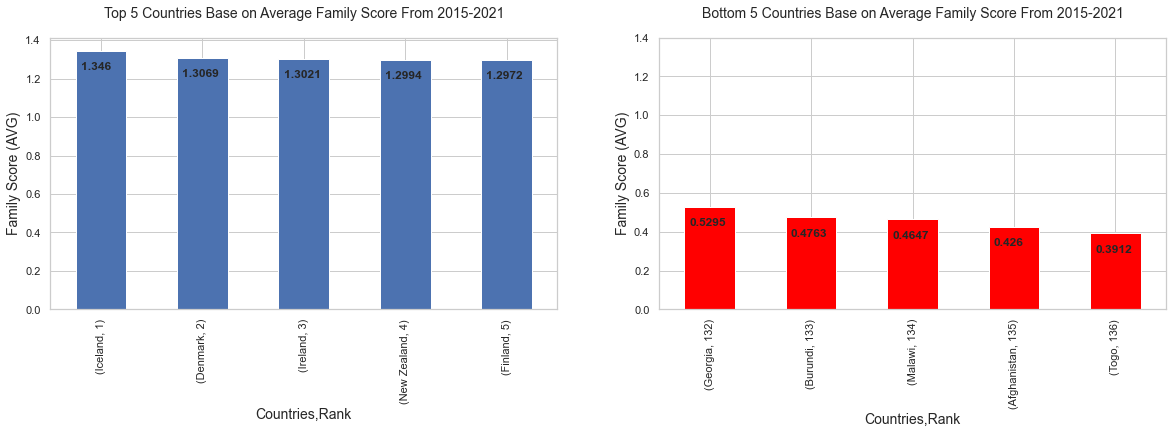

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Family Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Fam[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,1.6,step=0.2))

for index,data in enumerate(np.round(data_avg_Fam[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.1, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Family Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Family Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Fam[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,1.6,step=0.2))

for index,data in enumerate(np.round(data_avg_Fam[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.1, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Family Score (AVG)", fontsize=14)

plt.show()

### Dataframe containing only Health Score to compare top and bottom 5 countires

In [60]:
# compare top and bottom 5 countries and bottom 5 countries based on Health (Life Expectancy)

data_avg_Hel = data_Happi.pivot_table(index='Country', columns='Year',values=['Health (Life Expectancy)'])
data_avg_Hel = data_avg_Hel.reset_index()

data_avg_Hel = data_avg_Hel.dropna(axis=0)

data_avg_Hel['AVG'] = data_avg_Hel.mean(axis=1)
data_hel = data_avg_Hel
data_avg_Hel = data_avg_Hel.sort_values(by='AVG', ascending=False)
data_avg_Hel['Rank'] = range(1,len(data_avg_Hel)+1)

data_avg_Hel = data_avg_Hel.set_index(['Country','Rank'])
data_hel.head()

Country Health (Life Expectancy)                                   \
Year                                  2015     2016      2017   2018   2019   
0     Afghanistan                  0.30335  0.17344  0.180747  0.255  0.361   
1         Albania                  0.81325  0.73007  0.731160  0.790  0.874   
2         Algeria                  0.61766  0.61804  0.617585  0.687  0.785   
4       Argentina                  0.78723  0.69711  0.695137  0.744  0.881   
5         Armenia                  0.72990  0.64083  0.637524  0.666  0.815   

                               AVG  
Year       2020    2021             
0     52.590000  52.493  15.193791  
1     68.708138  68.999  20.235088  
2     65.905174  66.005  19.319351  
4     68.803802  69.000  20.229754  
5     66.750656  67.055  19.613559

In [61]:
data_hel.tail()

Country Health (Life Expectancy)                                   \
Year                                2015     2016      2017   2018   2019   
167   Venezuela                  0.72052  0.61904  0.617144  0.657  0.805   
168     Vietnam                  0.74676  0.66157  0.652169  0.702  0.851   
169       Yemen                  0.40064  0.31048  0.310081  0.343  0.463   
170      Zambia                  0.29924  0.23573  0.257836  0.295  0.426   
171    Zimbabwe                  0.33475  0.15950  0.196764  0.248  0.433   

                               AVG  
Year       2020    2021             
167   66.505341  66.700  19.517721  
168   67.952736  68.034  19.942891  
169   56.727283  57.122  16.525212  
170   55.299377  55.809  16.088883  
171   55.617260  56.201  16.170039

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


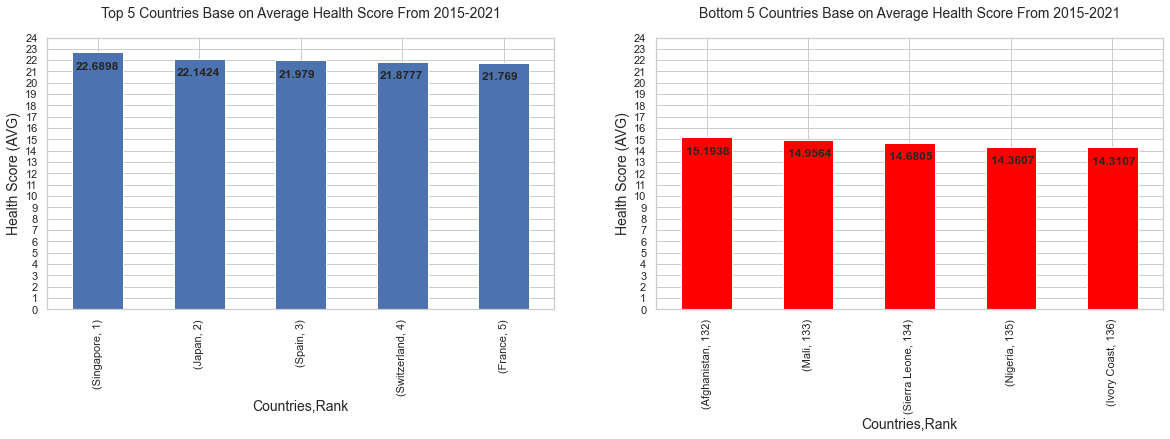

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Health Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Hel[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,25,step=1))

for index,data in enumerate(np.round(data_avg_Hel[0:5]['AVG'],4)):
    plt.text(x=index-0.22, y =data-1.5, s=f"{data}", fontdict=dict(fontsize=12), fontweight='bold')
plt.ylabel("Health Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Health Score From 2015-2021", fontsize=14,y=1.05)
data_avg_Hel[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,25,step=1))

for index,data in enumerate(np.round(data_avg_Hel[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-1.5, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Health Score (AVG)", fontsize=14)

plt.show()

### Dataframe containing only Freedom Score to compare top and bottom 5 countires

In [62]:
# compare top and bottom 5 countries and bottom 5 countries based on Freedom

data_avg_fre = data_Happi.pivot_table(index='Country', columns='Year',values=['Freedom'])
data_avg_fre = data_avg_fre.reset_index()

data_avg_fre = data_avg_fre.dropna(axis=0)

data_avg_fre['AVG'] = data_avg_fre.mean(axis=1)
data_fre = data_avg_fre
data_avg_fre = data_avg_fre.sort_values(by='AVG', ascending=False)
data_avg_fre['Rank'] = range(1,len(data_avg_fre)+1)

data_avg_fre = data_avg_fre.set_index(['Country','Rank'])
data_fre.head()

Country  Freedom                                                    \
Year                  2015     2016      2017   2018   2019      2020   2021   
0     Afghanistan  0.23414  0.16430  0.106180  0.085  0.000  0.396573  0.382   
1         Albania  0.35733  0.31866  0.381499  0.419  0.383  0.781994  0.785   
2         Algeria  0.28579  0.21006  0.233336  0.077  0.086  0.466611  0.480   
4       Argentina  0.44974  0.42284  0.494519  0.570  0.471  0.831132  0.828   
5         Armenia  0.19847  0.14037  0.198303  0.260  0.283  0.712018  0.825   

           AVG  
Year            
0     0.195456  
1     0.489498  
2     0.262685  
4     0.581033  
5     0.373880

In [63]:
data_fre.tail()

Country  Freedom                                                    \
Year                2015     2016      2017   2018   2019      2020   2021   
167   Venezuela  0.42908  0.19847  0.153997  0.133  0.154  0.623278  0.615   
168     Vietnam  0.59444  0.55954  0.571056  0.618  0.543  0.939593  0.940   
169       Yemen  0.35571  0.22870  0.249464  0.244  0.143  0.599920  0.602   
170      Zambia  0.48827  0.42662  0.461603  0.503  0.431  0.806500  0.782   
171    Zimbabwe  0.25861  0.25429  0.336384  0.406  0.361  0.711458  0.677   

           AVG  
Year            
167   0.329546  
168   0.680804  
169   0.346113  
170   0.556999  
171   0.429249

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


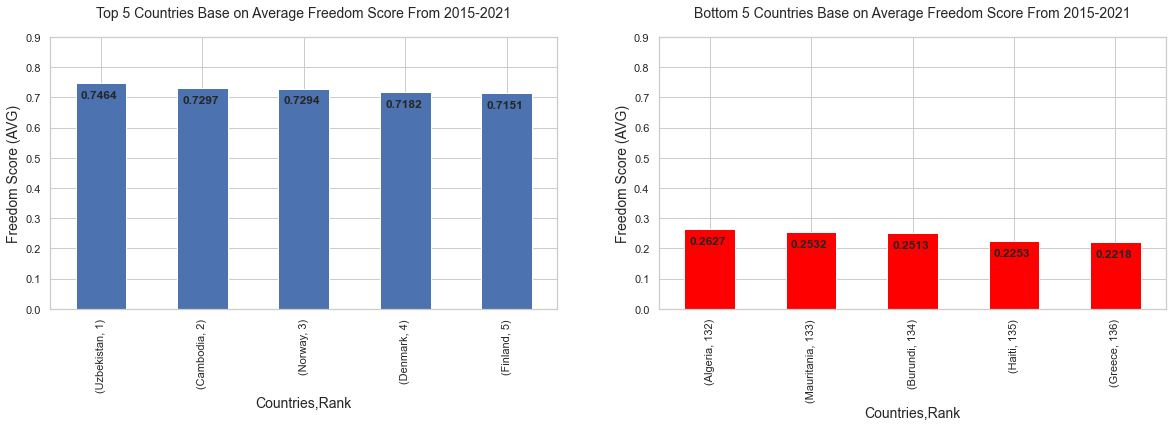

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Freedom Score From 2015-2021", fontsize=14,y=1.05)
data_avg_fre[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,1,step=0.1))

for index,data in enumerate(np.round(data_avg_fre[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.05, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Freedom Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Freedom Score From 2015-2021", fontsize=14,y=1.05)
data_avg_fre[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,1,step=0.1))

for index,data in enumerate(np.round(data_avg_fre[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.05, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Freedom Score (AVG)", fontsize=14)

plt.show()

### Dataframe containing only Trust Score to compare top and bottom 5 countires

In [64]:
# compare top and bottom 5 countries and bottom 5 countries based on Trust (Government Corruption)

data_avg_tru = data_Happi.pivot_table(index='Country', columns='Year',values=['Trust (Government Corruption)'])
data_avg_tru = data_avg_tru.reset_index()

data_avg_tru = data_avg_tru.dropna(axis=0)

data_avg_tru['AVG'] = data_avg_tru.mean(axis=1)
data_tru = data_avg_tru
data_avg_tru = data_avg_tru.sort_values(by='AVG', ascending=False)
data_avg_tru['Rank'] = range(1,len(data_avg_tru)+1)

data_avg_tru = data_avg_tru.set_index(['Country','Rank'])
data_avg_tru.head()

Trust (Government Corruption)                            \
Year                                       2015     2016      2017   2018   
Country      Rank                                                           
Rwanda       1                          0.55191  0.50521  0.455220  0.444   
Turkmenistan 2                          0.30844  0.28467  0.259270  0.037   
Georgia      3                          0.38331  0.31880  0.251667  0.215   
Singapore    4                          0.49210  0.46987  0.464308  0.457   
Saudi Arabia 5                          0.32524  0.30008  0.273432  0.127   

                                                AVG  
Year                2019      2020   2021            
Country      Rank                                    
Rwanda       1     0.411  0.183541  0.167  0.388269  
Turkmenistan 2     0.028  0.883692  0.888  0.384153  
Georgia      3     0.164  0.665945  0.655  0.379103  
Singapore    4     0.453  0.109784  0.082  0.361152  
Saudi Arabia 5     0.132  0.682620  0.684  0.360625

In [65]:
data_avg_tru.tail()

Trust (Government Corruption)                                   \
Year                                    2015     2016      2017   2018   2019   
Country   Rank                                                                  
Burundi   132                        0.10062  0.09419  0.084148  0.076  0.180   
Lithuania 133                        0.01031  0.01820  0.011866  0.006  0.042   
Poland    134                        0.04212  0.05500  0.059308  0.064  0.050   
Tanzania  135                        0.05747  0.05099  0.066035  0.097  0.147   
Armenia   136                        0.03900  0.03616  0.026674  0.028  0.064   

                                      AVG  
Year                2020   2021            
Country   Rank                             
Burundi   132   0.606935  0.607  0.249842  
Lithuania 133   0.809584  0.826  0.246280  
Poland    134   0.686927  0.735  0.241765  
Tanzania  135   0.619799  0.577  0.230756  
Armenia   136   0.773545  0.629  0.228054

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


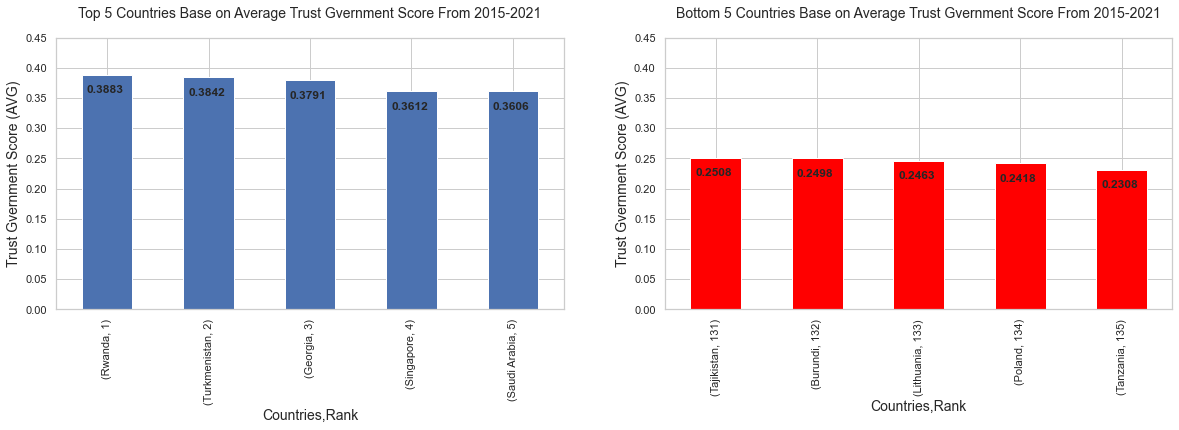

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Trust Gvernment Score From 2015-2021", fontsize=14,y=1.05)
data_avg_tru[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,0.5,step=0.05))

for index,data in enumerate(np.round(data_avg_tru[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.03, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Trust Gvernment Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Trust Gvernment Score From 2015-2021", fontsize=14,y=1.05)
data_avg_tru[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,0.5,step=0.05))

for index,data in enumerate(np.round(data_avg_tru[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.03, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Trust Gvernment Score (AVG)", fontsize=14)

plt.show()

### Dataframe containing only Generosity Score to compare top and bottom 5 countires

In [66]:
# compare top and bottom 5 countries and bottom 5 countries based on Generosity

data_avg_gen = data_Happi.pivot_table(index='Country', columns='Year',values=['Generosity'])
data_avg_gen = data_avg_gen.reset_index()

data_avg_gen = data_avg_gen.dropna(axis=0)

data_avg_gen['AVG'] = data_avg_gen.mean(axis=1)
data_gen=data_avg_gen
data_avg_gen = data_avg_gen.sort_values(by='AVG', ascending=False)
data_avg_gen['Rank'] = range(1,len(data_avg_gen)+1)

data_avg_gen = data_avg_gen.set_index(['Country','Rank'])
data_gen.head()

Country Generosity                                             \
Year                    2015     2016      2017   2018   2019      2020   
0     Afghanistan    0.36510  0.31268  0.311871  0.191  0.158 -0.096429   
1         Albania    0.14272  0.16840  0.201313  0.149  0.178 -0.042309   
2         Algeria    0.07822  0.07044  0.069437  0.055  0.073 -0.121105   
4       Argentina    0.11451  0.10989  0.109457  0.062  0.066 -0.194914   
5         Armenia    0.07855  0.07793  0.083488  0.077  0.095 -0.138780   

                  AVG  
Year   2021            
0    -0.102  0.162889  
1    -0.030  0.109589  
2    -0.067  0.022570  
4    -0.182  0.012135  
5    -0.168  0.015027

In [67]:
data_gen.tail()

Country Generosity                                                    \
Year                  2015     2016      2017   2018   2019      2020   2021   
167   Venezuela    0.05841  0.04250  0.065020  0.056  0.064 -0.169091 -0.169   
168     Vietnam    0.16860  0.25075  0.234968  0.177  0.147 -0.094533 -0.098   
169       Yemen    0.09131  0.09821  0.104125  0.083  0.108 -0.157735 -0.147   
170      Zambia    0.19591  0.17866  0.249580  0.221  0.247  0.078037  0.061   
171    Zimbabwe    0.18987  0.18503  0.189143  0.132  0.151 -0.072064 -0.047   

           AVG  
Year            
167  -0.007452  
168   0.112255  
169   0.025701  
170   0.175884  
171   0.103997

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


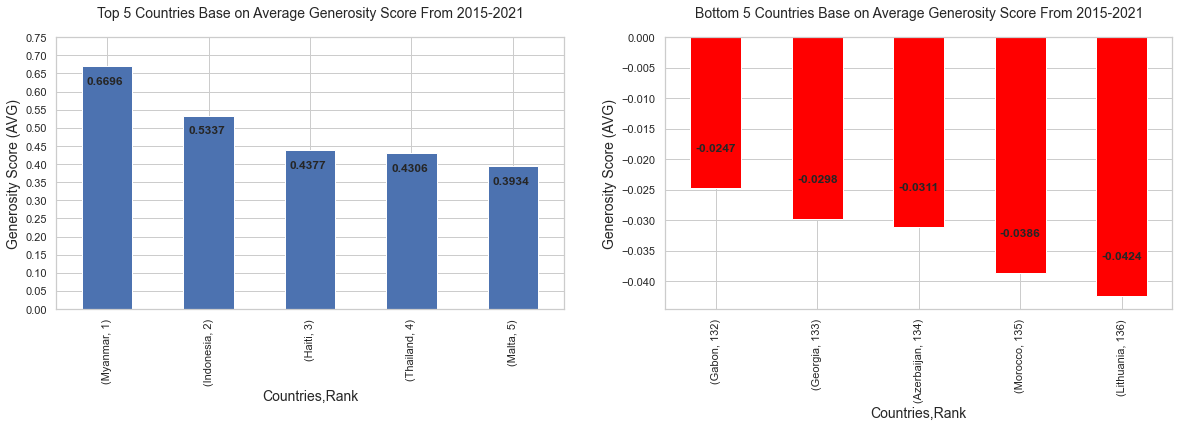

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 5 Countries Base on Average Generosity Score From 2015-2021", fontsize=14,y=1.05)
data_avg_gen[0:5]['AVG'].plot(kind='bar')
plt.xlabel("Countries,Rank",fontsize=14)
plt.yticks(np.arange(0,0.8,step=0.05))

for index,data in enumerate(np.round(data_avg_gen[0:5]['AVG'],4)):
    plt.text(x=index-0.2, y =data-0.05, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Generosity Score (AVG)", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 5 Countries Base on Average Generosity Score From 2015-2021", fontsize=14,y=1.05)
data_avg_gen[-6:-1]['AVG'].plot(kind='bar',color='red')
plt.xlabel("Countries,Rank",fontsize=14)

for index,data in enumerate(np.round(data_avg_gen[-6:-1]['AVG'],4)):
    plt.text(x=index-0.2, y =data+0.006, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Generosity Score (AVG)", fontsize=14)

plt.show()

### Correlation between different features and showing which feature is most correlated to happiness score

In [33]:
data_Happi.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.174340,0.559725,0.103562,0.399134,0.080176,0.048637
Economy (GDP per Capita),0.174340,1.000000,-0.305719,0.992811,0.785836,0.878179,-0.626813
Family,0.559725,-0.305719,1.000000,-0.359766,-0.044966,-0.326908,0.211691
Health (Life Expectancy),0.103562,0.992811,-0.359766,1.000000,0.773244,0.881829,-0.626545
Freedom,0.399134,0.785836,-0.044966,0.773244,1.000000,0.733128,-0.342672
Trust (Government Corruption),0.080176,0.878179,-0.326908,0.881829,0.733128,1.000000,-0.537360
Generosity,0.048637,-0.626813,0.211691,-0.626545,-0.342672,-0.537360,1.000000


### The correlation shows that Family affects the happiness the most and then freedom, GDP, Health, Trust and generosity respectively.


### Now to compare the years 2020 and 2021 data of happiness score and get insights of the effect of COVID-19, we prepare a dataframe containing only these two years.

In [34]:
df_comp = pd.concat([df_20,df_21])

df_comp.rename(columns={'Regional indicator':'Region'},inplace=True)
df_comp = df_comp.drop(['Ladder score in Dystopia', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual','Happiness Rank'],axis=1)
df_comp.head()

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2020


In [35]:
# wide df
df_main = df_comp.melt(id_vars=['Country','Region','Year'],
                      value_vars=df_comp.columns[2:-2],
                      var_name='Var',value_name='Value')

df_main['all']=''
display(df_main)

,Country,Region,Year,Var,Value,all
0,Finland,Western Europe,2020,Happiness Score,7.8087,
1,Denmark,Western Europe,2020,Happiness Score,7.6456,
2,Switzerland,Western Europe,2020,Happiness Score,7.5599,
3,Iceland,Western Europe,2020,Happiness Score,7.5045,
4,Norway,Western Europe,2020,Happiness Score,7.4880,
...,...,...,...,...,...,...
2713,Lesotho,Sub-Saharan Africa,2021,Generosity,-0.1310,
2714,Botswana,Sub-Saharan Africa,2021,Generosity,-0.2460,
2715,Rwanda,Sub-Saharan Africa,2021,Generosity,0.0610,
2716,Zimbabwe,Sub-Saharan Africa,2021,Generosity,-0.0470,


### Preparing a dataframe which contains the percentage change in every feature, from 2020 to 2021 which clearly shows the effect of COVID-19 on all the features of dataframe.

In [37]:
# wide %change df

dfall = df_main.pivot(index=['Country', 'Region'], columns=['Var', 'Year'], values='Value').reset_index()

# display(dfall)
scorecols = df_comp.columns[2:-2]
scorecols
# dfall[('Happiness Score',2021)][0]
for col in scorecols:
    dfall[(col, '% Ch')] = ((dfall[(col, 2021)] - dfall[(col, 2020)])/dfall[(col, 2020)])*100
# display(dfall.sort_index(axis=1))

dfdiff = dfall[['Country', 'Region']].join(dfall.loc[:, pd.IndexSlice[:, '% Ch']])
# display(dfdiff)

dfdiff.columns = dfdiff.columns.to_flat_index().str.join(' ').str.rstrip(' ')
dfdiff.dropna(inplace=True)
display(dfdiff)

# create long %change df

dfdiffM = dfdiff.melt(id_vars = dfdiff.columns[0:2], 
                      value_vars = dfdiff.columns[2:], 
                      var_name='Var', value_name='Value'
                     )
# dfdiffM['all'] = ''

# add feature
dfdiffM['% Change'] = dfdiffM.apply(lambda row: 'Positive' if row.Value > 0
                                  else 'Negative', 
                                  axis=1)
display(dfdiffM)

,Country,Region,Happiness Score % Ch,Standard error of ladder score % Ch,upperwhisker % Ch,lowerwhisker % Ch,Economy (GDP per Capita) % Ch,Family % Ch,Health (Life Expectancy) % Ch,Freedom % Ch,Generosity % Ch
0,Afghanistan,South Asia,-1.710235,21.361448,-1.227818,-2.256195,3.110596,-1.566214,-0.184446,-3.674735,5.776869
1,Albania,Central and Eastern Europe,4.798575,5.139856,4.833334,4.783166,1.083777,3.863908,0.423330,0.384373,-29.093920
2,Algeria,Middle East and North Africa,-2.359589,19.811896,-1.979694,-2.752877,-2.054577,-0.172413,0.151469,2.869434,-44.676182
3,Argentina,Latin America and Caribbean,-0.764892,4.786970,-0.648839,-0.868050,1.539554,-0.285148,0.285155,-0.376885,-6.625421
4,Armenia,Commonwealth of Independent States,12.961860,-1.016046,12.633518,13.284813,4.247291,5.481412,0.455941,15.867884,21.055247
...,...,...,...,...,...,...,...,...,...,...,...
149,Venezuela,Latin America and Caribbean,-3.190053,-0.436384,-3.131565,-3.251533,1.060464,-3.302773,0.292697,-1.328190,-0.053527
150,Vietnam,Southeast Asia,1.074066,15.382014,1.259297,0.884193,1.855425,0.001512,0.119589,0.043321,3.667138
151,Yemen,Middle East and North Africa,3.702443,29.251249,4.415794,2.915598,-2.341367,1.713905,0.695814,0.346667,-6.805977
152,Zambia,Sub-Saharan Africa,8.341760,13.717475,8.526199,8.172739,-0.969273,1.312996,0.921570,-3.037849,-21.832080


,Country,Region,Var,Value,% Change
0,Afghanistan,South Asia,Happiness Score % Ch,-1.710235,Negative
1,Albania,Central and Eastern Europe,Happiness Score % Ch,4.798575,Positive
2,Algeria,Middle East and North Africa,Happiness Score % Ch,-2.359589,Negative
3,Argentina,Latin America and Caribbean,Happiness Score % Ch,-0.764892,Negative
4,Armenia,Commonwealth of Independent States,Happiness Score % Ch,12.961860,Positive
...,...,...,...,...,...
1327,Venezuela,Latin America and Caribbean,Generosity % Ch,-0.053527,Negative
1328,Vietnam,Southeast Asia,Generosity % Ch,3.667138,Positive
1329,Yemen,Middle East and North Africa,Generosity % Ch,-6.805977,Negative
1330,Zambia,Sub-Saharan Africa,Generosity % Ch,-21.832080,Negative


In [38]:
# display(dfall.sort_index(axis=1))

### The choropleth animation map of world which shows the values of each feature for each country in year 2020 and next shows the percentage change in the values from 2020 to 2021.

In [40]:
import plotly.express as px
data = df_main[df_main.Year==2021]
fig = px.choropleth(data, locations='Country', locationmode='country names', 
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Purpor_r',
                    title=('Values from 2021 Report')
                   )
fig.update_layout(height=600)
fig.show()

In [41]:
data=dfdiffM

fig = px.choropleth(data, locations='Country', locationmode='country names', 
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Tropic',
                    color_continuous_midpoint=0,
                    title=('Percentage Change From 2020 to 2021')
                   )
fig.update_layout(height=600)
fig.show()

In [73]:
df_20 = df_20.sort_values(by='Happiness Score', ascending=False)
df_21 = df_21.sort_values(by='Happiness Score',ascending=False)
# df_20.set_index('Country',inplace=True)
# df_21.set_index('Country',inplace=True)
df_20.tail(10)

,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Happiness Rank
Country,,,,,,,,,,,,,,,,,,,,,
India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,...,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131,2020,144
Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,...,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718,2020,145
Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,...,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473,2020,146
Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,...,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241,2020,147
Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,...,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963,2020,148
Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,2020,149
Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,2020,150
Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,2020,151
South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,2020,152


### The chart showing the top and bottom 10 countries basis of happiness score in year 2020 and next shows the same in year 2021 which shows the countries which improved in score and the one's who became more worse.

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



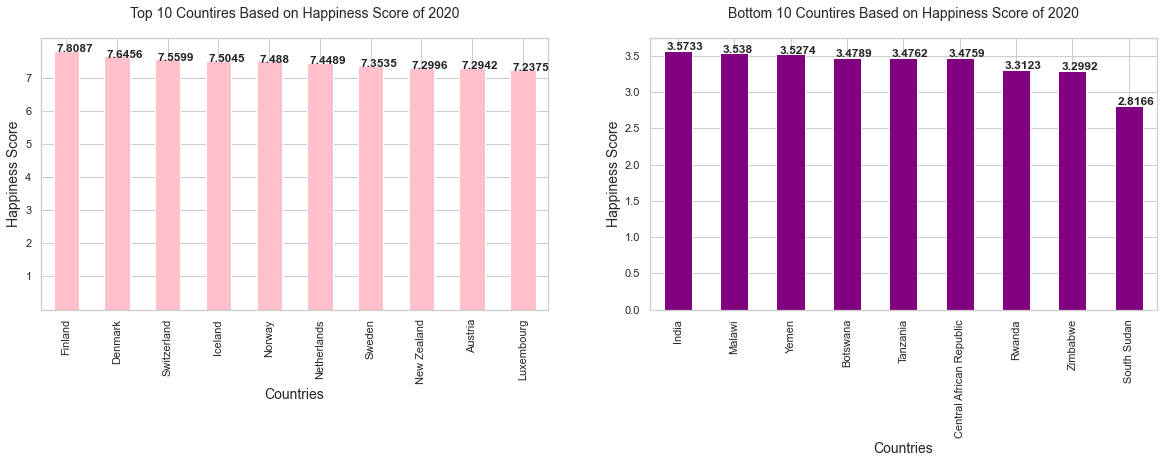

In [44]:
# top and bottom 10 countries in both years 2020 and 2021

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.title("Top 10 Countires Based on Happiness Score of 2020", fontsize=14,y=1.05)
df_20[0:10]['Happiness Score'].plot(kind='bar',color='pink')
plt.xlabel("Countries",fontsize=14)
plt.yticks(np.arange(1,8,step=1))

for index,data in enumerate(np.round(df_20[0:10]['Happiness Score'],4)):
    plt.text(x=index-0.2, y =data-0.05, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 10 Countires Based on Happiness Score of 2020", fontsize=14,y=1.05)
df_20[-10:-1]['Happiness Score'].plot(kind='bar', color='purple')
plt.xlabel("Countries",fontsize=14)

for index,data in enumerate(np.round(df_20[-10:-1]['Happiness Score'],4)):
    plt.text(x=index-0.2, y =data+0.006, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)

plt.show()

c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



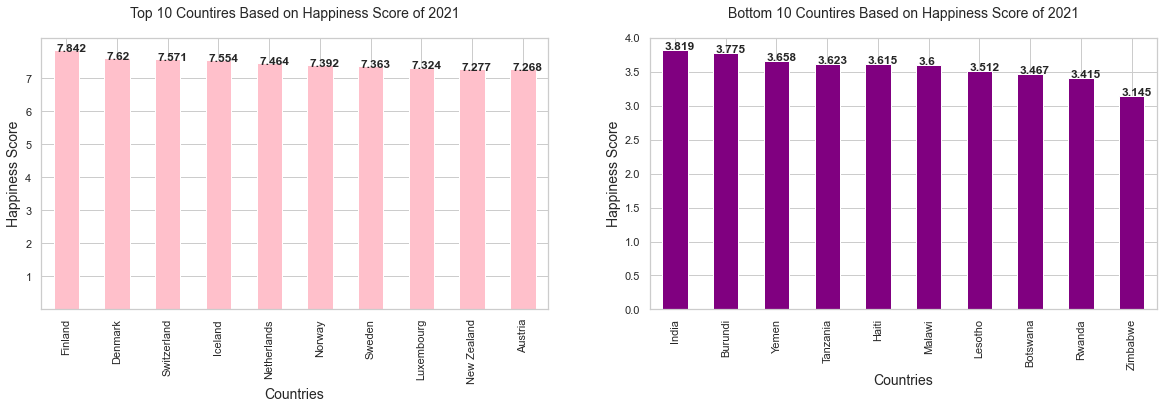

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Top 10 Countires Based on Happiness Score of 2021", fontsize=14,y=1.05)
df_21[0:10]['Happiness Score'].plot(kind='bar',color='pink')
plt.xlabel("Countries",fontsize=14)
plt.yticks(np.arange(1,8,step=1))

for index,data in enumerate(np.round(df_21[0:10]['Happiness Score'],4)):
    plt.text(x=index-0.2, y =data-0.05, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 10 Countires Based on Happiness Score of 2021", fontsize=14,y=1.05)
df_21[-11:-1]['Happiness Score'].plot(kind='bar', color='purple')
plt.xlabel("Countries",fontsize=14)

for index,data in enumerate(np.round(df_21[-11:-1]['Happiness Score'],4)):
    plt.text(x=index-0.2, y =data+0.006, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)
plt.show()

### The next bar chart I made to show the percentage change of happiness score for 10 countires from 2020 to 2021, which countries improved there score the most and which get more worse in the case of happiness of it's people.

In [46]:
dfdiff.sort_values('Happiness Score % Ch',ascending=False,inplace=True)
dfdiff.set_index('Country',inplace=True)
display(dfdiff)

,Region,Happiness Score % Ch,Standard error of ladder score % Ch,upperwhisker % Ch,lowerwhisker % Ch,Economy (GDP per Capita) % Ch,Family % Ch,Health (Life Expectancy) % Ch,Freedom % Ch,Generosity % Ch
Country,,,,,,,,,,
Armenia,Commonwealth of Independent States,12.961860,-1.016046,12.633518,13.284813,4.247291,5.481412,0.455941,15.867884,21.055247
Zambia,Sub-Saharan Africa,8.341760,13.717475,8.526199,8.172739,-0.969273,1.312996,0.921570,-3.037849,-21.832080
Jamaica,Latin America and Caribbean,7.117388,29.363496,7.979598,6.200773,1.995832,-4.226470,0.596127,3.721320,9.506467
Ukraine,Commonwealth of Independent States,6.891487,4.661682,6.846584,6.938350,4.720052,1.037757,0.456947,9.187118,-64.440084
India,South Asia,6.876000,-6.144757,6.654644,7.104188,-1.071478,1.823547,0.693866,1.310930,54.643814
...,...,...,...,...,...,...,...,...,...,...
Lebanon,Middle East and North Africa,-3.929584,25.702836,-3.422875,-4.454841,2.822943,2.870407,0.370183,-4.780475,19.251291
El Salvador,Latin America and Caribbean,-4.525621,11.590975,-4.247089,-4.830395,1.626704,-5.469878,0.444330,6.499688,-9.145705
Zimbabwe,Sub-Saharan Africa,-4.673862,-1.149498,-4.545776,-4.842605,0.982598,-1.715749,1.049566,-4.843281,-34.780153


c:\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



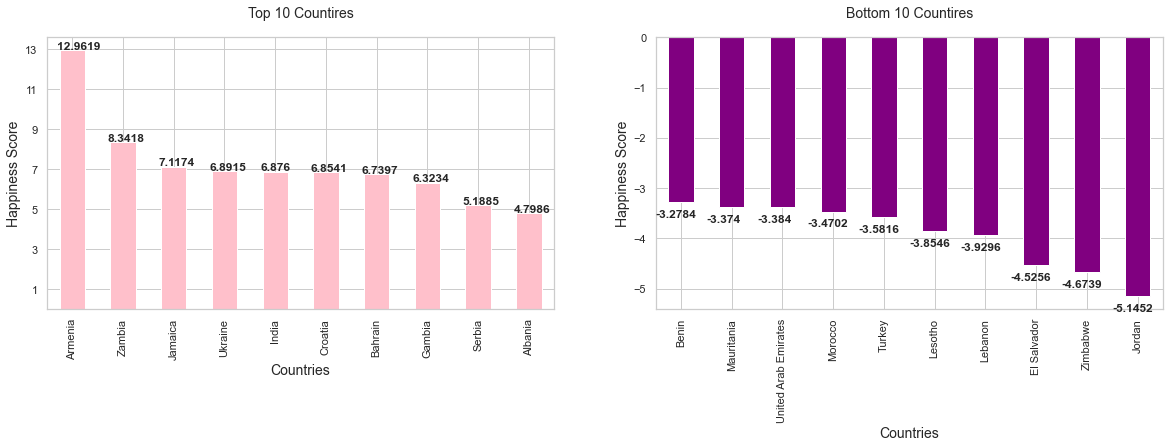

In [47]:
# % change from 2020 to 2021

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Top 10 Countires", fontsize=14,y=1.05)
dfdiff[0:10]['Happiness Score % Ch'].plot(kind='bar',color='pink')
plt.xlabel("Countries",fontsize=14)
plt.yticks(np.arange(1,14,step=2))

for index,data in enumerate(np.round(dfdiff[0:10]['Happiness Score % Ch'],4)):
    plt.text(x=index-0.3, y =data+0.05, s=f"{data}", fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)

plt.subplot(1,2,2)

plt.title("Bottom 10 Countires", fontsize=14,y=1.05)
dfdiff[-11:-1]['Happiness Score % Ch'].plot(kind='bar', color='purple')
plt.xlabel("Countries",fontsize=14)

for index,data in enumerate(np.round(dfdiff[-11:-1]['Happiness Score % Ch'],4)):
    plt.text(x=index-0.5, y =data-0.3, s=f"{data}",fontdict=dict(fontsize=12),fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14)
plt.show()

### Finally, the pie chart shows the number of countires which responded positively to the pandemic situation and number of countries which on which COVID effected more negatively.

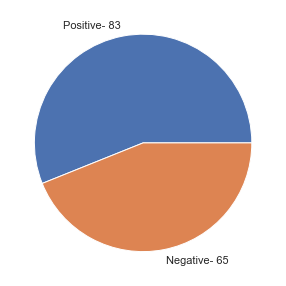

In [48]:
value_neg = dfdiff[dfdiff['Happiness Score % Ch']<0]
# value_neg
value_pos = dfdiff[dfdiff['Happiness Score % Ch']>0]
# value_pos
plt.figure(figsize=(10,5))
data = [len(value_pos), len(value_neg)]
labels = ['Positive- {}'.format(data[0]),'Negative- {}'.format(data[1])]
plt.pie(data, labels=labels)
plt.show()